# Random Forest Project

#### For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

#### Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.

#### We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from here or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

##### Here are what the columns represent:

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


In [1]:
import numpy as np
import pandas as pd



In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [6]:
df.columns.nunique()

11

In [7]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

"""
Hypothesis:
1. Midddle-age will be more innterested
2. high avg balance accounts will be more interested
3. Males will be more interested than females
4. metropolitan cities will be more interested than other cities
"""    

In [8]:
df.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
df['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [10]:
dict={'Yes':1,'No':0}
df['Credit_Product']=df['Credit_Product'].replace(dict)

In [11]:
df['Credit_Product']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
245720    NaN
245721    0.0
245722    0.0
245723    0.0
245724    0.0
Name: Credit_Product, Length: 245725, dtype: float64

In [12]:
df['Credit_Product'].unique()

array([ 0., nan,  1.])

In [13]:
#df['Credit_Product'].fillna(df['Credit_Product'].mean())

Ignore observations of missing values if we are dealing with large data sets and less number of records has missing values

Ignore variable, if it is not significant

Develop model to predict missing values

Treat missing data as just another category

In [14]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [15]:
df.corr()

,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.192131,0.145232,0.230814
Vintage,0.631242,1.000000,0.168490,0.167433,0.279642
Credit_Product,0.192131,0.168490,1.000000,0.061731,0.315173
Avg_Account_Balance,0.145232,0.167433,0.061731,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.315173,0.053370,1.000000


In [16]:
test=df[['Age',
       'Vintage', 'Avg_Account_Balance',
       'Is_Lead', 'Credit_Product']]

In [17]:
test.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Credit_Product
0,73,43,1045696,0,0.0
1,30,32,581988,0,0.0
2,56,26,1484315,0,0.0
3,34,19,470454,0,0.0
4,30,33,886787,0,0.0


In [18]:
print(test.shape)

(245725, 5)


In [19]:
yo=test[test['Credit_Product'].isnull()]
print(yo.shape)
yo.sample(5)

(29325, 5)


,Age,Vintage,Avg_Account_Balance,Is_Lead,Credit_Product
168272,68,91,465105,1,NaN
83092,49,44,637640,1,NaN
180645,38,14,432718,1,NaN
19156,77,85,723730,1,NaN
80056,56,86,656312,1,NaN


In [20]:
test=test.dropna()
X_train=test[['Age',
       'Vintage', 'Avg_Account_Balance',
       'Is_Lead']]
y_train=test['Credit_Product']





In [21]:
print(yo.shape)

(29325, 5)


In [22]:
X_test=yo.drop('Credit_Product',axis=1)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
pred=lr.predict(X_test)

In [27]:
df.Credit_Product.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
245720     True
245721    False
245722    False
245723    False
245724    False
Name: Credit_Product, Length: 245725, dtype: bool

In [28]:
df.loc[df.Credit_Product.isnull(),'Credit_Product']=pred

In [29]:
df.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [30]:
df['Credit_Product'].count()

245725

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Age', ylabel='Credit_Product'>

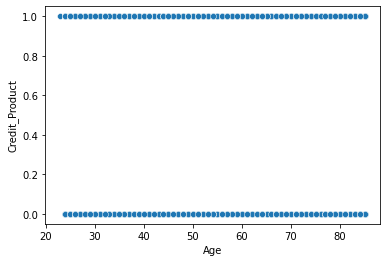

In [32]:
sns.scatterplot(x='Age',y='Credit_Product',data=df)

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Credit_Product'>

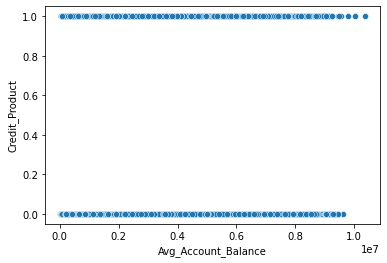

In [33]:
sns.scatterplot(x='Avg_Account_Balance',y='Credit_Product',data=df)

In [34]:
#sns.pairplot(data=df)

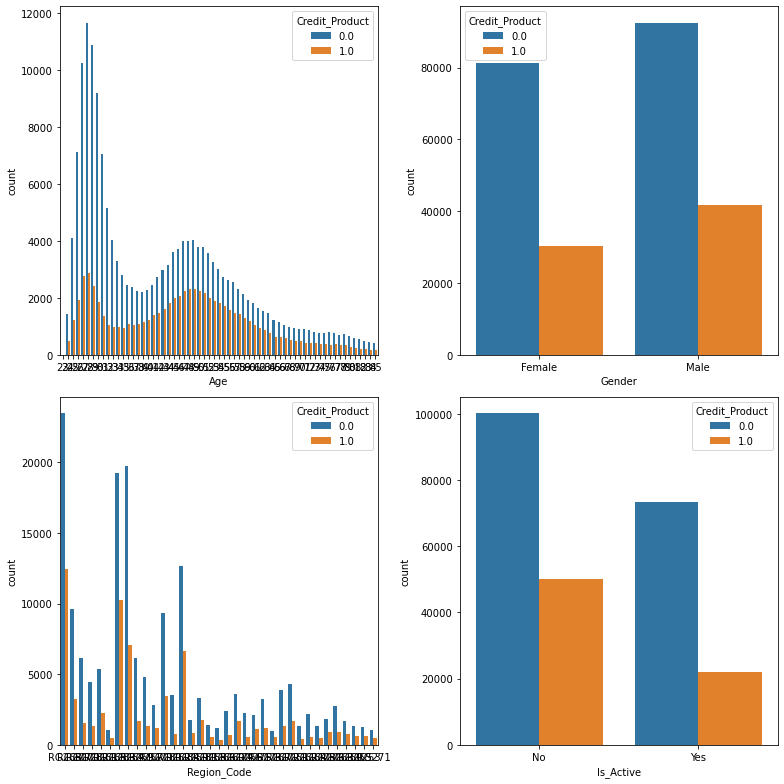

In [35]:
fig, axes = plt.subplots(2,2,figsize=(11,11))
sns.countplot(ax=axes[0,0],x='Age',hue='Credit_Product',data=df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(ax=axes[0,1],x='Gender',hue='Credit_Product',data=df)
sns.countplot(ax=axes[1,0],x='Region_Code',hue='Credit_Product',data=df)
#sns.countplot(ax=axes[1,1],x='Occupation',hue='Credit_Product',data=df)
#sns.countplot(ax=axes[1,1],x='Vintage',hue='Credit_Product',data=df)
sns.countplot(ax=axes[1,1],x='Is_Active',hue='Credit_Product',data=df)
plt.subplots_adjust(left=0.1, right=1.1)
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.1, 1.05))



In [36]:
#https://www.analyticsvidhya.com/blog/2021/09/cross-sell-prediction-using-machine-learning-in-python/

In [37]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,0.0,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,0.0,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,0.0,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,0.0,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,0.0,886787,No,0


<b>The given problem is an imbalance problem as the Response variable with the value 1 is significantly lower than the value zero.<b>

In [38]:
df['Credit_Product'].value_counts()

0.0    173682
1.0     72043
Name: Credit_Product, dtype: int64

C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Product', ylabel='Count'>

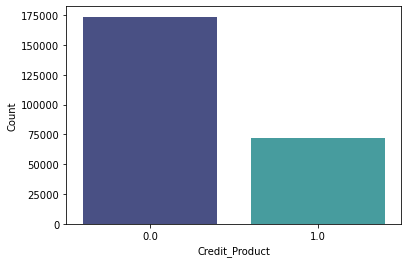

In [39]:
Credit_Product=df.loc[:,'Credit_Product'].value_counts().rename('Count')
plt.xlabel('Credit_Product')
plt.ylabel('Count')
sns.barplot(Credit_Product.index,Credit_Product.values,palette='mako')

C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Product', ylabel='Count'>

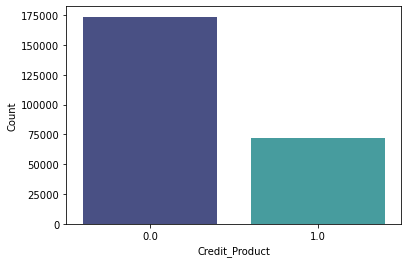

In [40]:
#same thing above
Credit_Product=df['Credit_Product'].value_counts()
plt.xlabel('Credit_Product')
plt.ylabel('Count')
sns.barplot(Credit_Product.index,Credit_Product.values,palette='mako')

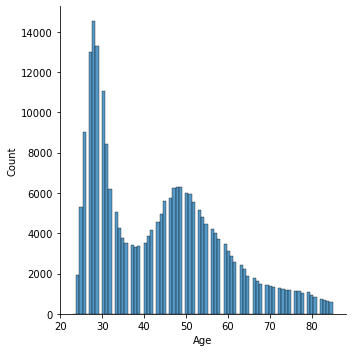

In [41]:
sns.displot(df['Age'])

In [42]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,0.0,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,0.0,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,0.0,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,0.0,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,0.0,886787,No,0


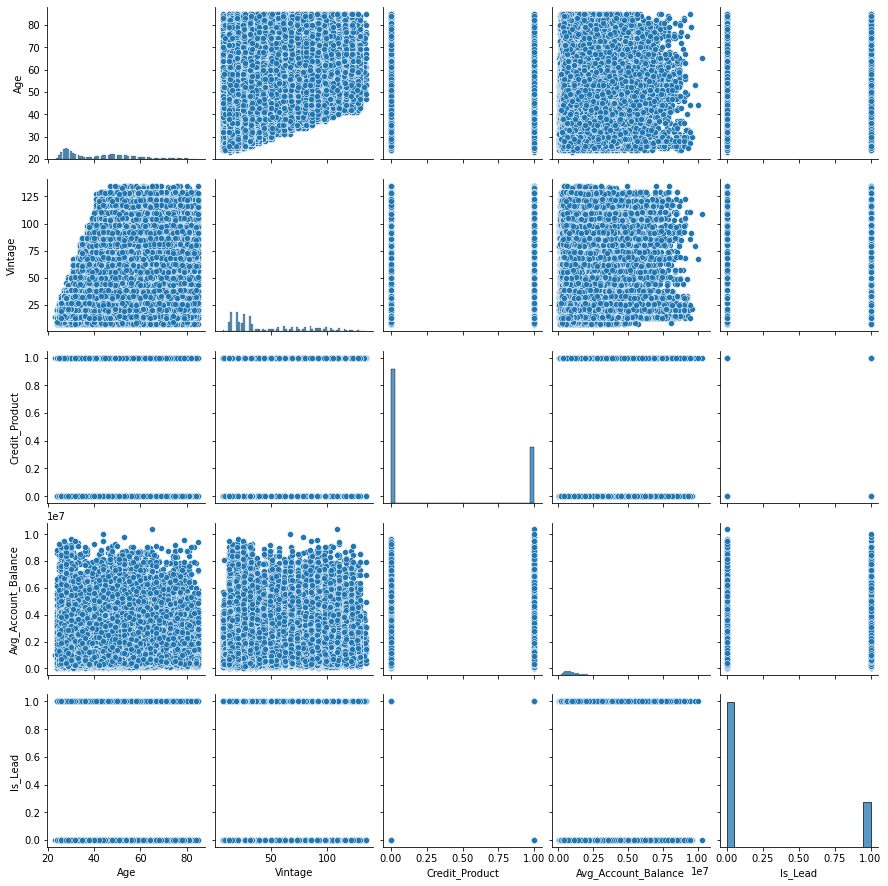

In [43]:
sns.pairplot(data=df)

In [44]:
df['Is_Active'].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
dict={'Yes':1,'No':0}
df['Is_Active']=df['Is_Active'].replace(dict)

<b> Data preprocessing
    
1. Convert the categorical features into dummies or doing categorical encoding.
2. Binning the numerical features.
3. dropping the unnecessary columns like ids.
<b>

In [46]:
df.describe()

,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725.000000,245725.000000,245725.000000,2.457250e+05,245725.000000,245725.000000
mean,43.856307,46.959141,0.293185,1.128403e+06,0.388381,0.237208
std,14.828672,32.353136,0.455224,8.529364e+05,0.487383,0.425372
min,23.000000,7.000000,0.000000,2.079000e+04,0.000000,0.000000
25%,30.000000,20.000000,0.000000,6.043100e+05,0.000000,0.000000
50%,43.000000,32.000000,0.000000,8.946010e+05,0.000000,0.000000
75%,54.000000,73.000000,1.000000,1.366666e+06,1.000000,0.000000
max,85.000000,135.000000,1.000000,1.035201e+07,1.000000,1.000000


In [47]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [48]:
df['Region_Code'].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [49]:
def data_prep(df):
    df=df.drop(columns=['ID','Channel_Code'])
    df=pd.get_dummies(df,columns=['Gender'],prefix='Gender')
    #df=pd.get_dummies(df,columns=['Region_Code'],prefix='Region_Code')
    
    df=pd.get_dummies(df,columns=['Is_Active'],prefix='Is_Active')
    df=pd.get_dummies(df,columns=['Is_Lead'],prefix='Is_Lead')
    #Use `cut` when you need to segment and sort data values into bins
    df['Age']=pd.cut(df['Age'],bins=[20,30,40,50,60,70,90])
    df['Age']=df['Age'].cat.codes
    df['Vintage']=pd.cut(df['Vintage'], bins=[0,30,60,90,120,150])
    df['Vintage']=df['Vintage'].cat.codes
    
    df['Avg_Account_Balance']=pd.cut(df['Avg_Account_Balance'],bins=[0,1000000,5000000,11000000])
    df['Avg_Account_Balance']=df['Avg_Account_Balance'].cat.codes
    df['Occupation']=df['Occupation'].map({'Other':0,'Salaried':1,'Self_Employed':2,'Entrepreneur':3})
    
    return df
df1=data_prep(df)
                                     
                                     
    

In [50]:
df1.head()

,Age,Region_Code,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Gender_Female,Gender_Male,Is_Active_0,Is_Active_1,Is_Lead_0,Is_Lead_1
0,5,RG268,0,1,0.0,1,1,0,1,0,1,0
1,0,RG277,1,1,0.0,0,1,0,1,0,1,0
2,3,RG268,2,0,0.0,1,1,0,0,1,1,0
3,1,RG270,1,0,0.0,0,0,1,1,0,1,0
4,0,RG282,1,1,0.0,0,1,0,1,0,1,0


In [51]:
df1.isna().sum()

Age                    0
Region_Code            0
Occupation             0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Gender_Female          0
Gender_Male            0
Is_Active_0            0
Is_Active_1            0
Is_Lead_0              0
Is_Lead_1              0
dtype: int64

In [52]:
df1.columns

Index(['Age', 'Region_Code', 'Occupation', 'Vintage', 'Credit_Product',
       'Avg_Account_Balance', 'Gender_Female', 'Gender_Male', 'Is_Active_0',
       'Is_Active_1', 'Is_Lead_0', 'Is_Lead_1'],
      dtype='object')

In [53]:
X=['Age', 'Occupation', 'Vintage', 'Avg_Account_Balance','Gender_Female', 'Gender_Male', 'Is_Active_0', 'Is_Active_1', 'Is_Lead_0',
       'Is_Lead_1']
y=['Credit_Product']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df1[X], df1[y], test_size=0.30)

In [56]:
X_train.shape

(172007, 10)

In [57]:
X_test.shape

(73718, 10)

<b>Handle Imbalance Data Problem 
    
    So to handle such a problem, we can resample the data. In the following code, we will be using undersampling.

Undersampling is the method where we will be reducing the occurrence of the majority class up to a given point.
<b>

In [58]:
from imblearn.under_sampling import RandomUnderSampler

In [59]:
RUS=RandomUnderSampler(sampling_strategy=0.5,random_state=3)

In [60]:
X_train,y_train=RUS.fit_resample(df1[X],df1[y])

<b>It is important to note here that for imbalanced classification problems, the F1 score is a more significant metric.
<b>

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
LR=LogisticRegression()

def performance_met(model,X_train,y_train,X_test,y_test):
    acc_train = accuracy_score(y_train,model.predict(X_train))
    f1_train=f1_score(y_train, model.predict(X_train))
    acc_test=accuracy_score(y_test,model.predict(X_test))
    f1_test=f1_score(y_test, model.predict(X_test))
    print("training score:accuracy:{} f1:{}".format(acc_train,f1_train))
    print("testing score:accuracy:{} f1{}".format(acc_test,f1_test))
    

model = LogisticRegression()
model.fit(X_train,y_train) 
performance_met(model,X_train,y_train,X_test,y_test)

In [63]:
lr.fit(X_train,y_train)

C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [64]:
predictions=lr.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
print(classification_report(predictions,y_test))
print('\n')
print(confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81     66288
         1.0       0.15      0.44      0.22      7430

    accuracy                           0.69     73718
   macro avg       0.54      0.58      0.52     73718
weighted avg       0.84      0.69      0.75     73718



[[47971 18317]
 [ 4171  3259]]


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
DTC=DecisionTreeClassifier()

In [69]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
predict=DTC.predict(X_test)

In [71]:
print(classification_report(predict,y_test))
print('\n')
print(confusion_matrix(predict,y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82     64635
         1.0       0.22      0.53      0.32      9083

    accuracy                           0.72     73718
   macro avg       0.57      0.64      0.57     73718
weighted avg       0.83      0.72      0.76     73718



[[47890 16745]
 [ 4252  4831]]


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
RFC=RandomForestClassifier()

In [74]:
RFC.fit(X_train,y_train)

<ipython-input-74-020fbb1fe26f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train,y_train)


RandomForestClassifier()

In [75]:
pred=RFC.predict(X_test)

In [76]:
print(classification_report(pred,y_test))
print('\n')
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82     64872
         1.0       0.22      0.54      0.31      8846

    accuracy                           0.72     73718
   macro avg       0.57      0.64      0.57     73718
weighted avg       0.84      0.72      0.76     73718



[[48034 16838]
 [ 4108  4738]]


<b>Hyperparameter tuning

It is a process to find the best performing hyper-parameters.
    

Here, we will be using a GridSearch algorithm for finding the best parameters of a random forest classifier.
<b>

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = {

    'bootstrap': [True],

'max_depth': [20, 25],

'min_samples_leaf': [3, 4],

'min_samples_split': [100,300],

}

In [79]:
GSC=GridSearchCV(RFC,parameters,cv=3, verbose=2, n_jobs=-1)

In [ ]:
GSC.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
predi=GSC.predict(X_test)

In [ ]:
print(classification_report(predi,y_test))
print('\n')
print(confusion_matrix(predi,y_test))